<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/LSTM_for_Colored_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# Investigating the performance of RNN (GRU and LSTM) to predict different classes of colored noise

This code we gerenete Colored Noise from these python library [colorednoise](https://pypi.org/project/colorednoise/). We will also creating a datafreame for different values of $\beta$ and creating a datafreame with theses data using pandas library. With these data, we expect to train a LSTM model for predict the signal of colored noise


$$
\vec{F} = m \vec{a}
$$


# Genereting / Loading the Data

On the next cell we will import the librarys


</font>

In [ ]:
# !pip install jupyternotify # Install de Jupyter Notify
# %load_ext jupyternotify    # Loadgin Jupyter Notify
!pip install colorednoise
import colorednoise as cn
from matplotlib import mlab
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import tensorflow
from sklearn.preprocessing import MaxAbsScaler

On the abobe cell we will generate the colored noise and the power spctrum densitu using [mlab](https://matplotlib.org/stable/api/mlab_api.html)

In [ ]:
import colorednoise as cn
#from matplotlib import mlab
from matplotlib import pylab as plt
#import numpy as np

#input values
beta = 1         # the exponent: 0=white noite; 1=pink noise;  2=red noise (also "brownian noise")
samples = 2**16  # number of samples to generate (time series extension)

#Deffing some colores
beta = [0,1,2]
colors = ['black','magenta','red']
i = 0
for i in range(len(beta)):
  A = cn.powerlaw_psd_gaussian(beta[i], samples)

  #Deffing the great figure size
  plt.figure(figsize=(6,3),dpi=100)

  #Ploting first subfiure
  plt.subplot(1,2,1)
  plt.plot(A, color=colors[beta[i]], linewidth=1)
  plt.title('Colored Noise for β='+str(beta[i]))
  plt.xlabel('Samples (time-steps)')
  plt.ylabel('Amplitude(t)', fontsize='large')
  plt.xlim(1,32000)

  #Ploting second subfigure
  plt.subplot(122)
  spectrum, frequency = mlab.psd(A, NFFT=2**13)
  plt.loglog(frequency,spectrum, color=colors[beta[i]], linewidth=0.8)
  plt.title('Power Spectral Density of A(t) with β='+str(beta[i]))
  plt.xlabel('Frequency')
  plt.ylabel('Power Spectrum Density', fontsize='large')
  plt.grid(True)
  plt.savefig("color_noide_beta="+str(beta[i])+".png")

#ploting the intire figure
plt.show()

## Generating a DataFrame Using Pandas 🐼

Now, we will allocate several time series in a dataframe with different colored noises for different values of $\beta$. We will use pandas library for these Function.

After generet the pandas dataframe we converting these data for the string format and save int in a `.csv` file. We must to done these becouse pandas can't write the intere values alocatad in the the cell.

After that transform and save all these variables we return for the original statement for the data frame.

Any time these codes runs, they will generete a new data frame and that can be a problem for comparison evaluations. For these reason I create um single data frame and hosted in kaggles on [Syntetic Color Noise](https://www.kaggle.com/luanorionbarana/synthetic-colored-noise). Also available in google drive.

For these reason the next cell will be comented

In [ ]:
# Import pandas library 🐼
import pandas as pd

#GENERATING THE COLORED NOISE DATA FRAME
samples = 2**16
# initialize list of lists for diferents betas
data = []
for i in range(0,13): #the range of beta
    for j in range(0,10):
        beta = round(i/4,2)                          #alocating diferents values of beta
        A = cn.powerlaw_psd_gaussian(beta, samples)  #genereting the amplitude noise
        s, f = mlab.psd(A, NFFT=2**13)               #genereting the power spectrum density
        data.append([beta,A,f,s])                    #allocating the genereted data in a matrix

# Create the pandas DataFrame
df  = pd.DataFrame(data, columns = ['beta', 'Series','PSD','Frequency'])
df1 = df

#CONVERTING THE DATA FROM THE STRING FORMAT
#df['beta'] = df['beta'].map(lambda x: ','.join(map(str, x)))
df['Series'] = df['Series'].map(lambda x: ','.join(map(str, x)))
df['PSD'] = df['PSD'].map(lambda x: ','.join(map(str, x)))
df['Frequency'] = df['Frequency'].map(lambda x: ','.join(map(str, x)))

#Saving the data
df.to_csv("color.csv", index=False)

#Realocating the numerical values
df = df1

## Loagin a DataFrame

Dowloading the standatd dataframe ```color.csv``` from the gdrive

Now we will reading the data alocatad in the cvs file. Pandas can't read these values has a float. For these reason we must to convert the data for the original format we can fond whem we generat it. These code was provide for these review in [stackoverlow](https://stackoverflow.com/questions/65445581/saving-a-long-list-into-csv-in-pandas).

In [ ]:
#READING THE DATA

#df = pd.read_csv("/home/barauna/Documentos/color.csv")  #FOR UBUNTU
#df = pd.read_csv("C:/Users/luano/Documents/color.csv")  #FOR WINDOWS
# !gdown --id 1V_S8hoqK9g5mCMxwRGZbsyhuK7KjxZHl            #FOR GOOGLECOLAB
# df = pd.read_csv("color.csv")

#REALOCOTING THE DATA FOR THE FLOAT FORMAT
dfn['beta'] = dfn['beta'].str.split(',').map(lambda x: list(map(float, x)))
df['Series']    = df['Series'].str.split(',').map(   lambda x: list(map(float, x)))
df['PSD']       = df['PSD'].str.split(',').map(      lambda x: list(map(float, x)))
df['Frequency'] = df['Frequency'].str.split(',').map(lambda x: list(map(float, x)))


#NORMALIZING THE DATA
#Creating a vector with the coloumns name
columns = df.columns[1:]
#Loop for all the collus
for j in range(len(columns)):
    data=[]
    for i in range(len(df[columns[j]])):
        #reshaping the time series for a format that every single value inside the list is a vector,
        #that will make a matrix with 1 column e 6k lines.
        ghost = np.reshape(df[columns[j]][i],(len(df[columns[j]][0]),1))
        #normalizing using `MaxAbsScaler`.
        #That line will search for the Max VECTOR inside a list of vector and use for the
        #normalizartion. That can correctly work for negative numbers when all the values in the
        #"dataframe is vectors"
        norm = MaxAbsScaler().fit(ghost).transform(ghost)
        #Reshaping the normalization vector for vector in the same original format
        #We want 1 vector with 6k data, not 1 vecto with 6k vectors
        ghost_tensor = np.reshape(norm,(1,len(df[columns[j]][i])))
        #alocating these value in a data vector
        data.append(list(ghost_tensor[0]))
    #realocating theses normalized data in the dataframe
    df[columns[j]] = data
    del data




## Creating output Folders 📂

we will set a `path` for save the files we work here. In the and we exctract all componests for a `.zip` file.

In [ ]:
!mkdir "/content/LSTM_files/"
path = "/content/LSTM_files/"              #for googlecolab
#path = "C:/Users/luano/Documents/LSTM/"     #for Windows

# LSTM
## _Long Shott Term Memory_
Now we will introduce a Recurrent Neural Network (RNN) for these kind of RNN we will use the tensorflow library. From that library we will use the Keras for construct our LSTM model. These model was based on the these [tutorial](https://youtu.be/UbvkhuqVqUI).

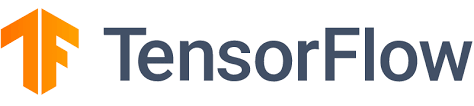

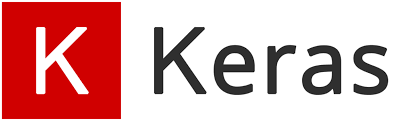

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" width =300>

# Prepering the Data 🗒️🏗️

Here we specially prepere the data for the LSTM arquitecture in `tensorflow`. I'ts very important to undersdand that Tensorflow work with VECTORED DATA. That's mean that every single information must to be in vector mode

* Exemple

numpy array format

`list1 = [1,2,3,3,4,5,6,7,9]`

Tensor formar

`list2 = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]`

And we will make tese using `reshape`. See that different ways to reshape a list. We can do these using `numpy` or `tensorflow` they will return diferent type of data but aparently that dosent chang anything



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In the next cell, we will create a function similarly to `train_test_split` from the `sklearn` library. The above logic is important because we will define how much data the LSTM model will use to predict the next step data. These functions will take the time series data and be performed by the `n_features` data training.

Its import to understand that in LSTM the predicted target will be the next value of temporal series based on a quantity of pre-understood data.

In [ ]:
def prepare_data(timeseries_data, n_features):
    X, y = [],[]
    for i in range(len(timeseries_data)):
        # Find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the Sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Prepering the data like sugest the boss:

_pegue uma serie pequena com 50 pontos.  (pode ser um pedaco da serie para beta=2 -  qualquer uma das dez geradas).  Construa duas series testes: uma (teste1.csv)  com os primeiros 10 pontos e outra (teste2.csv) com 50 pontos. Aplique a LSTM que vc implementou sobre elas.  Comece com a de 10 pontos.  Tente prever o 11o ponto com passo 4, por exemplo.   Conta 4 e preve o 5o.  veja o exemplo do video._

## We will defining a small time series data for only 10 values for $\beta = 2$

On the next cell que will chek the index of a $\beta = 2$ temporal series

In [ ]:
df['beta'][80]

On the next cell we will will define a new `timeseries_data` and plot these time series. Here we defing a set of parameters for these time series wich is:

* `serie_index` The id of the series in the dataframe.
* `min_size` and `max_size` how define the size of the time series data used on the LSTM model for traing.
* `n_step` defing how many numbers in the time series will be used to learn.

In [ ]:
timeseries_data = df['Series'][serie_index][min_size:max_size]

In [ ]:
# define input sequence
serie_index = 80

min_size , max_size = 0 , 1024 #Chosing a peace of the data frame

timeseries_data = df['Series'][serie_index][min_size:max_size]

# choose a number of time steps
n_steps = 5

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

#plt.plot(df["Series"][0:10])
plt.plot(timeseries_data, color='black', linewidth=1)
plt.show()

On next cell will print the data that will used for traing e test

In [ ]:
print(X),print(y)

On next two cell we will plot the shape of ```X``` and _reshape_ the it. These numpy array must to have a 3 dimensional size. _(I dont know why)_

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))           #Resheping with numpy
X = tensorflow.reshape(X,(X.shape[0],X.shape[1], n_features)) #reshaping with tensorflow

In [ ]:
X.shape

# Building The Model
On the next cell we will construc a LSTM model compose by two hindden layers with 50 neurons with.

Bild the architecture of these neural networks play a very important role in the power of prediction. Understanding how these _hyperparameters_ affect the accuracy of the model is Set

* Batch Gradient Descent. Batch Size = Size of Training Set
* Stochastic Gradient Descent. Batch Size = 1
* Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training


### LSTM Arquitecture 🏛️

On the next cell we will creat our LSTM Arquitecture.

We first will fix our _seeds_ for the network dosent randomicly define the inicial width. We meke that becouse we can reconstroct the same results for the same data, and the same _hyperparameters_. To better understand (or remember rs) read [these](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/) tutorial.

Secondely we build de model:

* ⚠️ Bach size = Gradiant Desendent [read more](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)


In [ ]:

# define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

#Setting Random seeds🌱
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(3)

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
history = model.fit(X, y, epochs=100, verbose=1, validation_split=0.8,
#                    batch_size= 1                   # * Stochastic Gradient Descent. Batch Size = 1
#                    batch_size= 32 # 64 # 128       # * Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training
                    batch_size=len(timeseries_data) # * Batch Gradient Descent. Batch Size = Size of Training Set
                    )

You probably will generate several tests for several parameters, so let's save wich analyses we made it. We will generete a lot of files? Yes we will, but we can delete it before ;)

In [ ]:
#Alocating the results
loss =     history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(0,len(loss))

#Defing a general file name
filename_traingXloss ="TraingLoss_beta"+str(df['beta'][serie_index])+"_timeSerieSize="+str(max_size-min_size)+"_nsteps="+str(n_steps)+"_eposch="+str(len(epochs))

#Saving a DataFrame with the Results
df_results = pd.DataFrame({'loss': loss, 'val_los': val_loss,'epochs':epochs})
df_results.to_csv((filename_traingXloss+".csv"), index=False)


Let's plot the chat of traing and validation Accuray and Loss of the model.

In [ ]:
#Plot the Training and Validation loss
plt.figure(figsize=(8, 4))
plt.plot(epochs,loss,    label='Training loss',  color='blue')
plt.plot(epochs,val_loss,label='Validation loss',color='red')
# Ploting the max value of vall_loss. We dont need these all the time, only whem test limits of the network
#plt.scatter(history.history['val_loss'].index(max(history.history['val_loss'])),max(history.history['val_loss']),label=('Max Val Loss ='+str(round(max(history.history['val_loss']),2))+"\nEpoch = "+str(history.history['val_loss'].index(max(history.history['val_loss'])))),color='purple',zorder=3,marker='*',linewidths=2)
plt.legend()
plt.title("Training and Validation loss for $n_{steps} =$"+str(n_steps))
# time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_") # What time is that?
plt.savefig(filename_traingXloss+".pdf")                             #Saving the figure with the currently data and time
plt.show()

On the next cell we will again redefing some parameters such as

* ```inti``` how will fit the value of witch part of the data frame we will select to test
* ```x_input``` will be a stat point fron the in the meadle (or not) data frame data having ```n_steps``` size
* ```i``` is the inicial value for initial step ¿
* ```f``` the value of the number of predicted values

In this cell, the RNN will start to predict the new steps of the time series called _days_. They will be running from an `input` vector from the size of  `max_size`$-$ `range` of the series on the data frame. It's important to observe that the initial points here are a group of points they already have learned. If `days` + `range` < `max_size`, the RNN will construct a learned prediction.

### ⚠️ ATENTION ⚠️

The ```#```s in the ```while``` can be uncomented for print the step by step results

In the end, we will creatin a vector called `day_new` how will have the same length of the `time_series` and a vector `day_pred` which will have the size of the predicted data.

In [ ]:
# demonstrate prediction for next `days` days
days = 20
range = 500
#n_steps =10

init = max_size - range

x_input = np.array(  df['Series'][serie_index][init:init + n_steps] ) # he is just working for n_stpes +1
temp_input=list(x_input)

lst_output=[]
i=0
f = days #number of newsteps
while(i<f):
# Não entendi muito bem o que ele fez aqui!
    if(len(temp_input)>n_steps): # !!!! ON THE ORIGNINAL CODE THAT IS JUST 3
        x_input=np.array(temp_input[1:])
#        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
#print(lst_output)

day_new=np.arange(min_size , max_size)
day_pred=np.arange(init,init+len(lst_output))

For the last, we will plot a chart with the orignal data from the time series, the start point from the learned model and the expected data not learnded on the time series

_Ta certo isso mesmo? Conferir viu?_

In [ ]:
from  datetime import datetime
plt.figure(figsize=(10, 4))
#plt.subplot(1,2,1)
#Original synsteic data
plt.plot(day_new[:init+1],timeseries_data[:init+1],label='Time Series',color="black",linewidth=0.8)
#Next expected data
plt.plot(day_pred,df['Series'][serie_index][init:init+len(lst_output)],color='gray',linewidth=0.5,label='Expected Data',linestyle='--')
#Predicted Model
plt.plot(day_pred,lst_output,label='Predict Model')
#Limists
plt.xlim(0 if init-len(lst_output)< 0 else init-len(lst_output),init+len(lst_output))
#Ploting the lerning limit in the data series
if day_pred[-1] > max_size and  1:
    plt.axvline(x=max_size,linestyle='--',color='red',linewidth=1,label='Learned Limet')
else: pass
#Ploting the outliers for the timeseries_data
plt.axhline(y= 3*np.std(timeseries_data), linestyle='--',color='blue',linewidth=1,label='Outlier')
plt.axhline(y=-3*np.std(timeseries_data), linestyle='--',color='blue',linewidth=1)
plt.legend()
#File Name
filename_model_results = "MODEL_beta"+str(df['beta'][serie_index])+"_timeSerieSize="+str(max_size-min_size)+"_nsteps="+str(n_steps)+"_days="+str(days)+"_eposch="+str(len(epochs))+"bath_size"+str(len(timeseries_data))
#Alocating the time model genetrion
time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")
plt.savefig(time+filename_model_results+".pdf")
#plt.show()/content/sample_data


# Rubens's Code

<img src="https://web.whatsapp.com/pp?e=https%3A%2F%2Fpps.whatsapp.net%2Fv%2Ft61.24694-24%2F55859438_571733520003712_8198767391795052544_n.jpg%3Fccb%3D11-4%26oh%3Dcb9061e7962a968cf9b86b9b5fcb6c1b%26oe%3D6190346C&t=l&u=5512991991800%40c.us&i=1404055322&n=EoVUuydTKeWBkGkSQA2Gm2sSBZtHvgc3g7cJJXbbxwQ%3D">

In [ ]:
from numpy.random import normal
import numpy as np

#1 -> 1D
#1.45 -> 2D
#

def cNoise(beta,shape=(1024,),std=0.001):
    '''
       Wrote by: Rubens Andreas Sautter (2021)

       Approximating spectral decay by the squared root of the 1/(f^n).
       Frequency are measured in multidimensional space by the frequency euclidian distance

       The gaussian standard deviation

       Based on paper:
      http://articles.adsabs.harvard.edu//full/1995A%26A...300..707T/0000707.000.html
    '''
    dimension = []
    for index,dsize in enumerate(shape):
        dimension.append(np.fft.fftfreq(dsize).tolist())
    dimension = tuple(dimension)
    d = float(len(dimension))

    freqs = np.power(np.sum(np.array(np.meshgrid(*dimension,indexing='ij'))**2,axis=0),1/2)

    #Sampling gaussian with sandard deviation varying according to frequency
    ftSample = normal(loc=0,scale=std,size=shape) + 1j*normal(loc=0,scale=std,size=shape)

    # Setting the scale [0,2pi]
    freqs = np.pi*freqs
    not0Freq = (np.abs(freqs)>1e-15)

    decayCorrection = np.sqrt(2)**(d-1)

    scaling = (freqs[not0Freq]+0j)**(-(beta*decayCorrection )/2)

    ftSample[not0Freq] = (ftSample[not0Freq]*scaling)

    not0Freq = (np.abs(freqs)>1e-15)

    spsd = np.sum(np.abs(ftSample))

    # zero avg
    ftSample[0] = 0.0

    out = np.fft.ifftn(ftSample*spsd).real

    return out

In [ ]:
A = cNoise(beta,shape=(1024,),std=0.001)

In [ ]:
#input values
beta = 1         # the exponent: 0=white noite; 1=pink noise;  2=red noise (also "brownian noise")
samples = 2**16 # number of samples to generate (time series extension)
#beta = [0,1,2]

#Deffing somo colores
colors = ['black','pink','brown']

A = cNoise(beta,shape=(1024,),std=0.001)
A0 = cn.powerlaw_psd_gaussian(beta, 1024)
#A = np.append(beta,A)

#Deffing the great figure size
plt.figure(figsize=(15,5))

#Ploting first subfiure
plt.subplot(1,2,1)
# plt.plot(A, color=colors[beta], linewidth=1)
# plt.title('Colored Noise for β='+str(beta))
# plt.xlabel('Samples (time-steps)')
# plt.ylabel('Amplitude(t)', fontsize='large')
spectrum, frequency = mlab.psd(A, NFFT=2**13)
plt.loglog(frequency,spectrum, color=colors[beta], linewidth=0.8)
plt.title('Power Spectral Density of A(t) with β='+str(beta))
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density', fontsize='large')
plt.grid(True)
plt.savefig("color_noide_beta="+str(beta)+".pdf")



#Ploting second subfigure
plt.subplot(122)
# plt.plot(A0, color=colors[beta], linewidth=1)
# plt.title('Colored Noise for β='+str(beta))
# plt.xlabel('Samples (time-steps)')
# plt.ylabel('Amplitude(t)', fontsize='large')
# #plt.savefig("color_noide_beta="+str(beta)+".pdf")
spectrum, frequency = mlab.psd(A0, NFFT=2**13)
plt.loglog(frequency,spectrum, color=colors[beta], linewidth=0.8)
plt.title('Power Spectral Density of A(t) with β='+str(beta))
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density', fontsize='large')
plt.grid(True)
plt.savefig("color_noide_beta="+str(beta)+".pdf")





#ploting the intire figure
plt.show()


# Zip File 📦

Creating a zip file with all the files stored here for future analyses.


In [ ]:
import os
from datetime import datetime #you have probably already import that
from zipfile import ZipFile
from os.path import basename
date = datetime.now().strftime('%Y-%m-%d')

# create a ZipFile object
with ZipFile(date+'_LSTM_files.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk(path):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath, basename(filePath))

In [ ]:
#Ziping Data for download📦
!zip -r /content/All_Files.zip /content